# Optimització - Descens del gradient

L’optimització matemàtica o la programació matemàtica és la selecció d’un millor element a partir d’un conjunt d’alternatives disponibles. Problemes d’optimització sorgeixen en totes les disciplines quantitatives, des de la informàtica i l’enginyeria fins a la investigació d’operacions i l’economia, i el desenvolupament de mètodes de solució d'aquests problemes ha estat d’interès en les matemàtiques durant segles.

En el cas més senzill, un problema d’optimització consisteix a maximitzar o minimitzar una funció real mitjançant l’elecció sistemàtica dels valors d’entrada dins d’un conjunt permès i el càlcul del valor de la funció. La generalització de la teoria i tècniques d’optimització a altres formulacions constitueix una àmplia àrea de les matemàtiques aplicades. 

Més generalment, l’optimització inclou trobar "els millors valors disponibles" d'alguna funció objectiu donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectiu i diferents tipus de dominis.

Es pot representar un problema d'optimització de la següent manera:

- Tenint en compte: una funció $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Busquem: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimització") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximització").

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funció de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funció $f(x_1, \cdots, x_n)$ és un vector format per les derivades parcials de la funció. 
Aquest dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

### 1. Cas Unidimensionals

Suposem que volem calcular el mimim numèric de la següent funció unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ és:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem és visualitzar la funció i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funció.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    %matplotlib inline

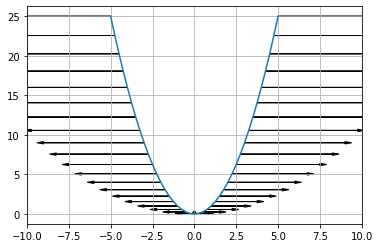

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

if __name__ == '__main__':
    # Function to plot
    X = np.arange(-5, 5.01, 0.25)
    fig = plt.figure()
    plot_1d(X, f1(X), fig)
    plot_gradient (X, f1(X), df1(X), fig=fig)
    fig.gca().set_xlim(-10, 10)

Per tant, una possible estratègia per maximitzar (*minimitzar*) la funció és repetir la següent estratègia:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcció (*contraria*) del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient és zero, que vol dir que hem trobat un màxim (*mínim*). Donat que la precisió flotant potser evita que arribem mai a aquest nombre, afegim dos mètodes més per acabar la cerca:

1. Si el moviment que realitzem és més petit que un epsilon ($|x^{k+1} - x^{k}| < eps$)
2. Si realitzem més de `max_iters` iteracions

Si la funció és **unimodal** (conté un únic màxim (*mínim*)), hem trobat la nostra solució. 
Sinó, pot ser que estem en un màxim (*mínim*) local i que sigui una solució no satisfactòria.

**Implementa la funció *gradient_descend_1d* seguint el procediment proposat. Durant el procés d'optimització visualitza els punts de la gràfica per on vagis passant.**

Recordeu que els ordinadors generen un error numèric, per tant no heu d'igualar mai a zero, heu de fer servir una tolerància.
Definiu també un nombre màxim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

Minimum point:	  0.003868562622766814 
Iterations:	  27


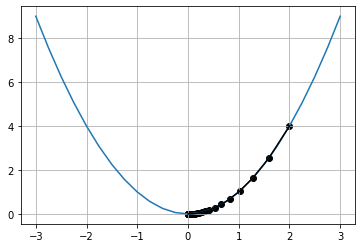

In [3]:
# Implementar per l'alumne

def gradient_descend_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el mínim
    de la funció seguint el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_epochs: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat.
    """
    """
    points = np.array()
    newpt = 100
    while np.absolute(newpt-x) > eps or :
    """
    points = np.array(x)
    iters = 0
    while iters < max_iters:
        newx = x - alpha*grad(x)
        points = np.append(points, newx)
        if np.absolute(x-newx) < eps:
            x = newx
            break
        iters += 1
        x = newx
    print("Minimum point:\t ", points[-1], "\nIterations:\t ", iters)
    return (points, x)

if __name__ == '__main__':
    X = np.arange(-3, 3.01, 0.25)
    points, minimum = gradient_descend_1d(df1, 2, .1)

    fig = plt.figure()
    plot_gradient_descend_1d(f1, X, points, minimum, fig)

Però... són totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un màxim i un mínim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funció**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [4]:
def f2 ( x ):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

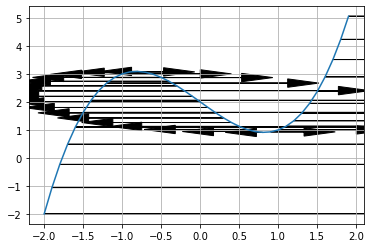

In [5]:
if __name__ == '__main__':
    X = np.arange(-2, 2, 0.1)
    fig = plt.figure()
    plot_1d(X, f2(X), fig)
    plot_gradient(X, f2(X), df2(X), fig=fig)

**Començant en el punt $x=0.75$, és possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del procés d'optimització**

Minimum point:	  -1.5552792041309912e+52 
Iterations:	  10


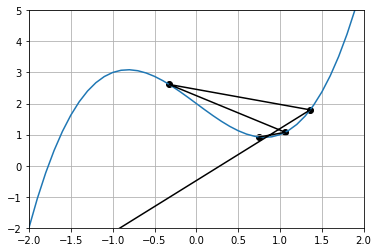

In [6]:
if __name__ == '__main__':
    X = np.arange(-20, 20, 0.1)
    x0 = 0.75
    points, minimum = gradient_descend_1d(df2, x0, 1, max_iters=10)

    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA


<hr />

<p />
Cambiando los valores de la alpha nos hemos dado cuenta de que con 10 iteraciones podemos saltar el máximo local que se encuentra aproximadamente en -0.7. Haciendo pruebas hemos visto que si alpha > 0.65 saltará sobre el dicho máximo local.

Una vez visto esto, vemos que el punto mínimo tiende a menos infinito ya que una vez pasado el máximo local la función solo desciende.
<p />

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funció
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

In [7]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

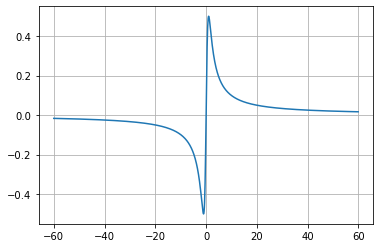

In [8]:
if __name__ == '__main__':
    X = np.arange(-60, 60, 0.1)
    fig = plt.figure()
    plot_1d(X, f2_2(X), fig)

Minimum point:	  -1.0005143337891587 
Iterations:	  16


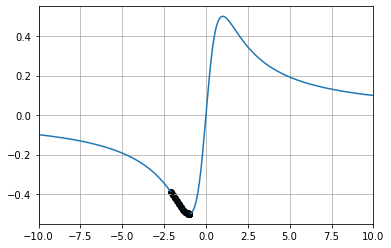

In [9]:
if __name__ == '__main__':
    x0 = (np.random.random() - 0.5) * 10
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

**Justifica el comportament per diferent punts d'inici. Podem arribar sempre al mínim? **

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

No siempre podremos llegar al mínimo. Si nuestro punto inicial es mayor que 1 tenderá a buscar el mínimo local hacia x=6. También hemos visto que si el punto inicial es 1 o -1 se quedará en el sitio.

En cambio, para valores entre 1 y -1; y los valores menores que -1 podemos ver que intentará buscar el mínimo que se encuentra en el punto -1.

A su vez, también hemos probado a que el punto inicial se encuentre en valores fuera del gráfico mostrado. Al hacer esto vemos que pasadas 100 iteraciones apenas avanza hacia el mínimo ya que la función es muy plana. Si el punto inicial se encuentra realmente lejos de 0, por ejemplo 100, veremos que no realiza ninguna iteración porque la diferencia entre el punto actual y el próximo ya es menor que la épsilon predeterminada.

### Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta és que sí. 

L'unic canvi en el procediment és que ara caldrà avançar en dues direccions.

Sigui la funció 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


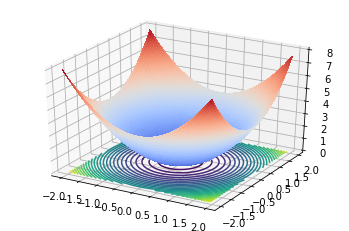

In [10]:
def f3 ( x, y=None ):
    if y is None:
        # x is an array with 2 rows
        x, y = x
        
    return x**2 + y**2

def grad_f3(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((2 * x, 2 * y))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f3)
    plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

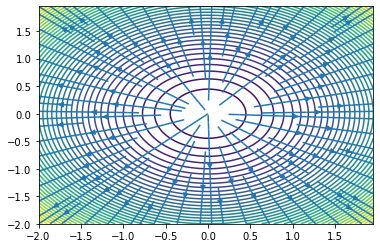

In [11]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [12]:
# Algorithm that implement the gradient descent
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat
    """
    points = np.array([x])
    iters = 0
    while iters < max_iter:
        iters += 1
        newx = x - alpha*gradient(x)
        points = np.append(points, [newx], axis = 0)
        nextvect = x-newx
        x = newx
        if np.absolute(np.linalg.norm(nextvect) < eps):
            break
    if verbose:
        print("Iterations:\t", iters)
    return (points, x)

if __name__ == '__main__':
    x0 = np.asarray([1, 1])
    points, minimum = gradient_descend_2d(grad_f3, x0)

Iterations:	 58


Minimum:  [0. 0.]


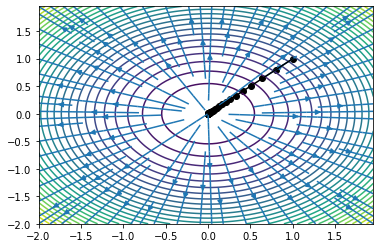

In [13]:
if __name__ == '__main__':
    print ("Minimum: ", np.round(minimum,3))

    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funció
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, és més útil utilizar el gradient normalizat per aplicar l'algorisme. 

** Fent servir `gradient_descend_2d`, podeu trobar el mínim de les funcions $f_3$ i $f_4$ amb el següents paràmetres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque són capaços, o no, de trobar el mínim amb aquest paràmetres. Quines dificultats presenta?**

In [14]:
def f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return 100 * (x**2 + y**2)

def grad_f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((200 * x, 200 * y))

In [15]:
if __name__ == '__main__':
    x0 = np.asarray((1, 1))
    alpha = 0.01
    points_f3, minimum_f3 = gradient_descend_2d(grad_f3, x0, alpha=0.5, max_iter=100, eps=1e-6)
    points_f4, minimum_f4 = gradient_descend_2d(grad_f4, x0, alpha=0.005, max_iter=100, eps=1e-6)

Iterations:	 2
Iterations:	 2


[0. 0.]


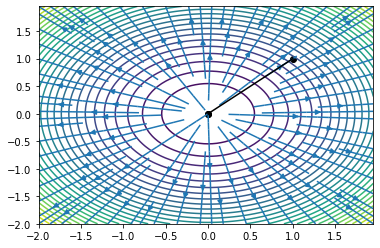

In [16]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
    print(minimum_f3)

[0. 0.]


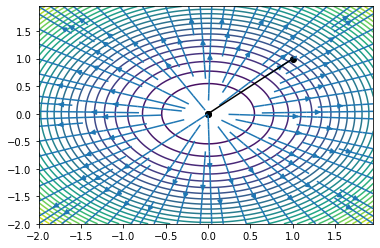

In [17]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f4)
    plot_gradient_descend_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
    print(minimum_f4)

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

<p />
Con los parámetros dados en f3 nos acercamos al mínimo, mientras que en f4 nos quedamos bastante lejos. Haciendo pruebas hemos visto que para llegar a al mínimo en el punto 0 en f3 y en f4 hemos tenido que variar las alphas.

Para ser exactos, en f3 hemos probaod con el valor alpha = 0.5 mientras que en f4 ha sido con alpha = 0.005. Esto se debe a que en f3 el gradiente es 100 veces menor que en f4. Podemos ver que si hacemos la operación 0.5/0.005 también vemos esta relación.

En conclusión, podemos decir que no podíamos encontrar correctamente el mínimo ya que la alpha no estaba correctamente ajustada en cada caso.

Nota: En la celda donde se calculan los mínimos hemos dejado los valores de alpha que hemos encontrado para que se vea correctamente el resultado.
<p />

## Temps de convergència

Observa ara la següent funció, anomenada funció de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El mínim d'aquesta funció es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [18]:
A_ROS = 1

def f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


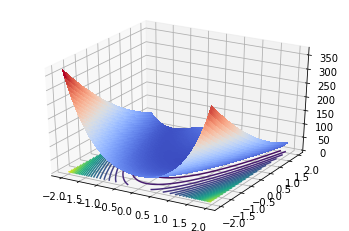

In [19]:
if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f_ros)
    plot_2d(X, Y, Z, fig)

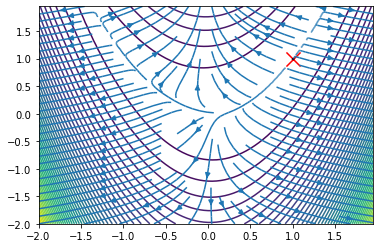

In [20]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f_ros, grad_f_ros, fig)
    plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

Aquesta funció té un mínim molt pla, la pendent és pràcticament nula al sel voltat, pel que els mètodes iteratius triguen molt a trobar el mínim

Iterations:	 2109
[0.99988876 0.99977307]


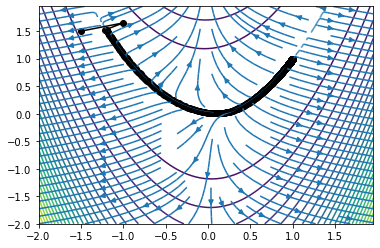

In [21]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

## Trobant el pas òptim

Una possibilitat per fer menys iteracions i accelerar la convergència és trobant el valor de $\alpha$ automàticament a cada pas, és a dir aquella $\alpha$ que fa mínim el valor de $f$.

L'algorisme és tal que:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [22]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param f: Funció a minimitzar
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param initial_alpha: Pas inicial a cada iteració, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat.
    """
    points = np.array([x])
    iters = 0
    alpha = initial_alpha
    while iters < max_iter:
        newx = x - alpha*gradient(x)
        if f(newx) > f(x):
            alpha /= 2
            continue
        else:
            alpha = initial_alpha
        iters += 1
        points = np.append(points, [newx], axis = 0)
        nextvect = x-newx
        x = newx
        if np.absolute(np.linalg.norm(nextvect) < eps):
            alpha = initial_alpha
            break
    if verbose:
        print("Iterations:\t", iters+1)
    return (points, x)

Iterations:	 1003
[0.99996455 0.99992681]


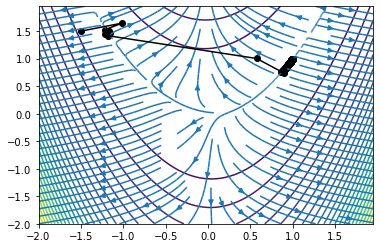

In [23]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

In [24]:
if __name__ == '__main__':
    %timeit gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

47.4 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
if __name__ == '__main__':
    %timeit gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000, verbose=False)

144 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Noteu que el segon mètode pot trigar més (és més costós), però pot convergir en menys iteracions. 